In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [3]:
np.random.seed(0)

X = np.arange(-10, 10, 0.1) + np.random.normal(0, 0.5, 200)
y = X + 3 * (X ** 2) - 2 * (X ** 3) + np.random.normal(0, 300, 200)

## Plot Data

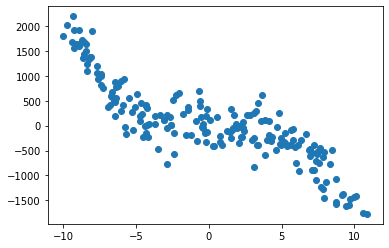

In [4]:
plt.scatter(X, y)

## Simple Linear Regression: fit, plot, score (test & training scores)

In [12]:
print(X.shape)
print(y.shape)

(200, 1)
(200,)


In [13]:
X = X.reshape(-1, 1)
X.shape

(200, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
y_pred = model.predict(X_test)
y_pred.shape

(40,)

Test score: 0.7439645271256414
Training score: 0.7358818005077657


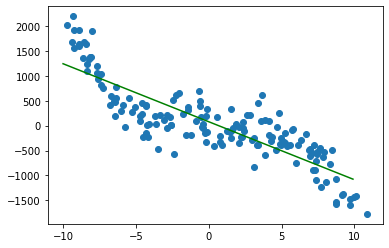

In [17]:
# PLOT (training set + model itself)

# Training samples
plt.scatter(X_train, y_train)

# Our regression line
X_plot = np.arange(-10, 10, 0.1).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, color='green')

# Check the scores (training and test scores)
test_score = model.score(X_test, y_test)
training_score = model.score(X_train, y_train)
print(f"Test score: {test_score}")
print(f"Training score: {training_score}")

## Polynomial Regression

In [18]:
polynomial_features = PolynomialFeatures(degree=2)

In [19]:
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

In [20]:
model = LinearRegression()
model.fit(X_poly_train, y_train)
X_poly_train.shape

(160, 3)

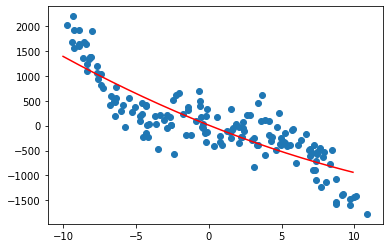

In [21]:
# Plots

# Our training samples
plt.scatter(X_train, y_train)

# Plot our "curve"
X_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
y_plot = model.predict(X_plot)
plt.plot(X_plot[:, 1], y_plot, color='red')

In [22]:
test_score = model.score(X_poly_test, y_test)
training_score = model.score(X_poly_train, y_train)
print(f"Test score: {test_score}")
print(f"Training score: {training_score}")

Test score: 0.7446338618348649
Training score: 0.7425001814409088


In [23]:
def plot_polynom_fit(degree=2):
    """
    input: degree of the polynomial regression to fit
    Should plot the training samples and the model itself
    """
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    # Plots
    plt.scatter(X_train, y_train)

    # Plot our "curve"
    X_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
    y_plot = model.predict(X_plot)

    plt.plot(X_plot[:, 1], y_plot, color='red')
    test_score = model.score(X_poly_test, y_test)
    plt.title(f"Polynomial fit degree {degree} - Test Score: {test_score}")
    plt.show()


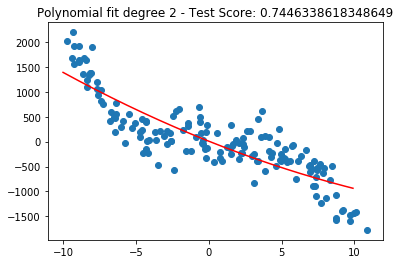

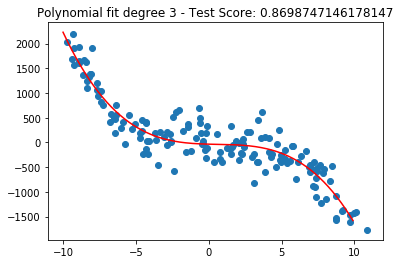

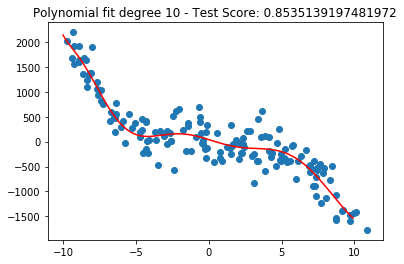

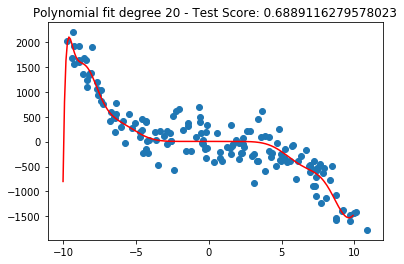

In [24]:
for d in [2, 3, 10, 20]:
    plot_polynom_fit(degree=d)

In [26]:
def test_score_by_degree(degree=2):
    """
    input: degree of the polynomial regression to fit
    output: score on test set
    """
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.fit_transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    test_score = model.score(X_poly_test, y_test)
    return test_score

Text(0.5, 1.0, 'Test error versus polynomial degree')

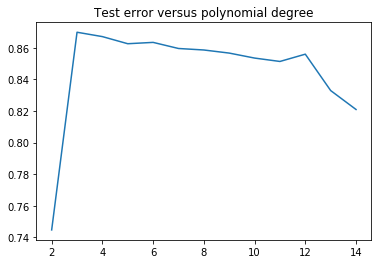

In [27]:
test_scores = []
for d in range(2, 15):
    test_scores.append(test_score_by_degree(d))

# Plot the scores against the polynomial degree
plt.plot(range(2, 15), test_scores)
plt.title("Test error versus polynomial degree")

We analyze some overfitting as our model gets more complex: it is having a hard time generalizing and the test error increases (test score decreases).
Let's check whether Regularization for degree=10 improves things to understand its impact.

We will work on Ridge Regression

# Analysis for degree 10

In [35]:
test_score = test_score_by_degree(degree=10)
test_score

0.8535139197481972

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.18248e-20): result may not be accurate.
  overwrite_a=True).T


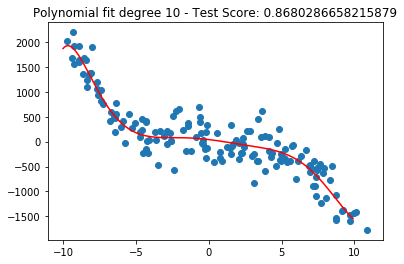

In [30]:
# Ridge for random value of Alpha
degree = 10

polynomial_features = PolynomialFeatures(degree=degree)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

model = Ridge(alpha=100)
model.fit(X_poly_train, y_train)


# Plots
plt.scatter(X_train, y_train)

# Plot our "curve"
X_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
y_plot = model.predict(X_plot)

plt.plot(X_plot[:, 1], y_plot, color='red')
test_score = model.score(X_poly_test, y_test)
plt.title(f"Polynomial fit degree {degree} - Test Score: {test_score}")
plt.show()

In [33]:
from sklearn.model_selection import GridSearchCV

# Find a good value for alpha
degree = 10

polynomial_features = PolynomialFeatures(degree=degree)
X_poly_train = polynomial_features.fit_transform(X_train)
X_poly_test = polynomial_features.fit_transform(X_test)

# model = Ridge(alpha=100)

alphas = np.logspace(-1, 7, 500)
parameters = {'alpha': alphas}
model = GridSearchCV(Ridge(), parameters, cv=5)
model.fit(X_poly_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.25947e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.89688e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.22994e-22): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.69087e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.40747e-23): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarni

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-01, 1.03760502e-01, 1.07662418e-01, 1.11711065e-01,
       1.15911962e-01, 1.20270833e-01, 1.24793621e-01, 1.29486487e-01,...
       4.95896201e+06, 5.14544388e+06, 5.33893840e+06, 5.53970928e+06,
       5.74803016e+06, 5.96418495e+06, 6.18846824e+06, 6.42118571e+06,
       6.66265452e+06, 6.91320378e+06, 7.17317494e+06, 7.44292233e+06,
       7.72281357e+06, 8.01323013e+06, 8.31456781e+06, 8.62723729e+06,
       8.95166472e+06, 9.28829225e+06, 9.63757866e+06, 1.00000000e+07])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

{'alpha': 10000000.0}
0.8657865390994435


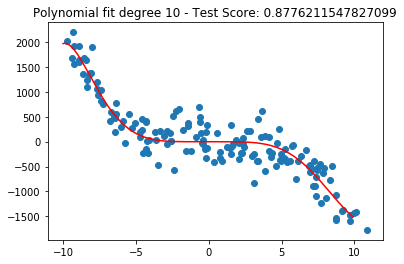

In [34]:
print(model.best_params_)
print(model.best_score_)


# Plots
plt.scatter(X_train, y_train)

# Plot our "curve"
X_plot = polynomial_features.fit_transform(np.arange(-10, 10, 0.1).reshape(-1, 1))
y_plot = model.predict(X_plot)

plt.plot(X_plot[:, 1], y_plot, color='red')
test_score = model.score(X_poly_test, y_test)
plt.title(f"Polynomial fit degree {degree} - Test Score: {test_score}")
plt.show()

So we have:
- an estimated (through CV) training score of 0.8657.
- a test error of 0.8535 for our non-regularized model
- a test error of 0.8776 for our regularized model (through ridge regression)